# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  

Mounted at /content/drive


In [ ]:
!nvidia~smi

/bin/bash: nvidia~smi: command not found


In [ ]:
from __future__ import print_function  #do it
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import torch.utils.data as data 
from torch.utils.data import Subset, DataLoader, random_split
from torchvision.datasets import ImageFolder
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose, ToTensor, Resize
from torch.optim.lr_scheduler import ExponentialLR, StepLR, ReduceLROnPlateau
from sklearn import metrics
from torch.nn import functional as F
import cv2
import tensorflow as tf


import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder

#from mtdp import build_model
#from mtdp.helpers import compute_loss, rescale_head_grads
#from mtdp.loader import MultiImageFolders
#from mtdp.networks import MultiHead

import matplotlib.pyplot as plt
import time
import os
import copy
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)





# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

PyTorch Version:  1.10.0+cu111
Torchvision Version:  0.11.1+cu111


In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
data_dir = '/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_train/'
fldr=['benign_adenosis', 'benign_fibroadenoma', 'benign_phyllodestumor', 'benign_tubularadenoma', 'malignant_ductalcarcinoma', 'malignant_lobularcarcinoma', 'malignant_mucinouscarcinoma', 'malignant_papillarycarcinoma']
list_of_data = []
img_size = 224      #128 earlier
for fol in sorted(os.listdir(data_dir)):
    for file in sorted(os.listdir(os.path.join(data_dir, fol))):
        json_dict = {}
        img_arr = cv2.imread(os.path.join(os.path.join(data_dir, fol), file))#[...,::-1] #convert BGR to RGB format
        resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
        json_dict['image'] = resized_arr
        json_dict['class_1'] = fol.split('_')[0]
        json_dict['class_2'] = fol.split('_')[1]
        list_of_data.append(json_dict)

x_train = []
y_train = []
print(list_of_data)

for i in range(0, len(list_of_data)):     #train.shape[0]
    x_train.append(list_of_data[i]['image'])
    y_train.append([list_of_data[i]['class_1'], list_of_data[i]['class_2']])

x_train = np.array(x_train, dtype = "float") / 255
x_train.reshape(x_train.shape[0],3, img_size, img_size)


print(x_train)

Streaming output truncated to the last 5000 lines.
        [162, 104, 191],
        [162, 104, 191],
        [162, 104, 191]],

       [[109,  44, 147],
        [109,  44, 147],
        [109,  44, 147],
        ...,
        [162, 104, 191],
        [162, 104, 191],
        [162, 104, 191]],

       ...,

       [[ 81,  41, 167],
        [ 81,  41, 167],
        [ 81,  41, 167],
        ...,
        [144,  43, 168],
        [144,  43, 168],
        [144,  43, 168]],

       [[ 81,  41, 167],
        [ 81,  41, 167],
        [ 81,  41, 167],
        ...,
        [144,  43, 168],
        [144,  43, 168],
        [144,  43, 168]],

       [[ 81,  41, 167],
        [ 81,  41, 167],
        [ 81,  41, 167],
        ...,
        [144,  43, 168],
        [144,  43, 168],
        [144,  43, 168]]], dtype=uint8), 'class_1': 'malignant', 'class_2': 'mucinouscarcinoma'}, {'image': array([[[168,  82, 187],
        [168,  82, 187],
        [168,  82, 187],
        ...,
        [163,  55, 189],
     

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=True,  # divide each input by its std
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train,seed = 42)

In [ ]:
y_train = np.array(y_train)
#print(y_train)
class_1 = y_train[:,0]
class_2 = y_train[:,1]
c_1 = len(set(class_1))
c_2 = len(set(class_2))

map_1 = {}
for i, j in enumerate(sorted(list(set(class_1)))):
    map_1[j] = i

map_2 = {}
for i, j in enumerate(sorted(list(set(class_2)))):
    map_2[j] = i

class_arr1 = []
for x in class_1:
    class_arr1.append(map_1[x])
class_arr1 = np.array(class_arr1)

class_arr2 = []
for x in class_2:
    class_arr2.append(map_2[x])
class_arr2 = np.array(class_arr2)

print(map_1)
print(map_2)
print(class_arr1)
print("")
print("-----------")
print("")
print(class_arr2)

{'benign': 0, 'malignant': 1}
{'adenosis': 0, 'ductalcarcinoma': 1, 'fibroadenoma': 2, 'lobularcarcinoma': 3, 'mucinouscarcinoma': 4, 'papillarycarcinoma': 5, 'phyllodestumor': 6, 'tubularadenoma': 7}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
val_dir = '/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_val/'
fldr=['benign_adenosis', 'benign_fibroadenoma', 'benign_phyllodestumor', 'benign_tubularadenoma', 'malignant_ductalcarcinoma', 'malignant_lobularcarcinoma', 'malignant_mucinouscarcinoma', 'malignant_papillarycarcinoma']
list_of_data = []
img_size = 224      #128 earlier
for fol in sorted(os.listdir(val_dir)):
    for file in sorted(os.listdir(os.path.join(val_dir, fol))):
        json_dict = {}
        img_arr = cv2.imread(os.path.join(os.path.join(val_dir, fol), file))#[...,::-1] #convert BGR to RGB format
        resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
        json_dict['image'] = resized_arr
        json_dict['class_1'] = fol.split('_')[0]
        json_dict['class_2'] = fol.split('_')[1]
        list_of_data.append(json_dict)

x_val = []
y_val = []
print(list_of_data)

for i in range(0, len(list_of_data)):     #train.shape[0]
    x_val.append(list_of_data[i]['image'])
    y_val.append([list_of_data[i]['class_1'], list_of_data[i]['class_2']])

x_val = np.array(x_val, dtype = "float") / 255
x_val.reshape(x_val.shape[0], 3,img_size, img_size)

print("x_val shape: ", x_val.shape)
print(x_val)

[{'image': array([[[183, 158, 190],
        [183, 158, 190],
        [183, 158, 190],
        ...,
        [175, 149, 189],
        [175, 149, 189],
        [175, 149, 189]],

       [[183, 158, 190],
        [183, 158, 190],
        [183, 158, 190],
        ...,
        [175, 149, 189],
        [175, 149, 189],
        [175, 149, 189]],

       [[183, 158, 190],
        [183, 158, 190],
        [183, 158, 190],
        ...,
        [175, 149, 189],
        [175, 149, 189],
        [175, 149, 189]],

       ...,

       [[185, 155, 204],
        [185, 155, 204],
        [185, 155, 204],
        ...,
        [187, 146, 209],
        [187, 146, 209],
        [187, 146, 209]],

       [[185, 155, 204],
        [185, 155, 204],
        [185, 155, 204],
        ...,
        [187, 146, 209],
        [187, 146, 209],
        [187, 146, 209]],

       [[185, 155, 204],
        [185, 155, 204],
        [185, 155, 204],
        ...,
        [187, 146, 209],
        [187, 146, 209],
        [187,

In [ ]:
y_val = np.array(y_val)
vclass_1 = y_val[:,0]
vclass_2 = y_val[:,1]
vc_1 = len(set(vclass_1))
vc_2 = len(set(vclass_2))


map_1 = {}
for i, j in enumerate(sorted(list(set(vclass_1)))):
    map_1[j] = i

map_2 = {}
for i, j in enumerate(sorted(list(set(vclass_2)))):
    map_2[j] = i

val_class_arr1 = []
for x in vclass_1:
    val_class_arr1.append(map_1[x])
val_class_arr1 = np.array(val_class_arr1)

val_class_arr2 = []
for x in vclass_2:
    val_class_arr2.append(map_2[x])
val_class_arr2 = np.array(val_class_arr2)

In [ ]:
print("val binary class label mapping: ", map_1)
print("val multi class label mapping: ", map_2)

val binary class label mapping:  {'benign': 0, 'malignant': 1}
val multi class label mapping:  {'adenosis': 0, 'ductalcarcinoma': 1, 'fibroadenoma': 2, 'lobularcarcinoma': 3, 'mucinouscarcinoma': 4, 'papillarycarcinoma': 5, 'phyllodestumor': 6, 'tubularadenoma': 7}


In [ ]:
from tensorflow import keras

base_model = keras.models.load_model('/content/drive/My Drive/ICIAR/new_models/r18m2.h5')    #k_iciar_dnet121_m2 has been saved to ...m1

In [ ]:
from keras.models import Model
model= Model(inputs=base_model.input, outputs=base_model.layers[-3].output) #

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
import keras 
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules

In [ ]:
import tensorflow_hub as hub
inputs = tf.keras.layers.Input(shape=[224, 224, 3], name='main_input')

main_branch = model(inputs)

#main_branch = hub.KerasLayer("https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2")(inputs) 
main_branch = tf.keras.layers.Flatten()(main_branch)
#main_branch = tf.keras.layers.Dropout(rate=0.25)(main_branch)
main_branch = tf.keras.layers.Dense(4096, activation=tf.keras.layers.LeakyReLU(alpha=0.1),  kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(1e-8))(main_branch)   #
primary_branch = tf.keras.layers.Dense(1,  activation='sigmoid', kernel_initializer='he_normal', name='primary_output')(main_branch)
finegrain_branch = tf.keras.layers.Dense(c_2, activation='softmax',  kernel_initializer='he_normal',name='finegrain_output')(main_branch)      #auto
model = tf.keras.Model(inputs = inputs,
outputs = [primary_branch, finegrain_branch])

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-5,                
    decay_steps=480,
    decay_rate=0.9)

#opt = keras.optimizers.SGD(learning_rate= lr_schedule, momentum=1)
opt = keras.optimizers.Adam(learning_rate= lr_schedule)
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, momentum=0.9, epsilon=1e-08)

model.compile(optimizer=opt ,  #rmsprop #sgd
              loss={'primary_output': "binary_crossentropy", 'finegrain_output': "sparse_categorical_crossentropy"},
              loss_weights={'primary_output':0.1, 'finegrain_output': 0.9},  metrics=['accuracy'])

model.fit({'main_input': x_train}, 
          {'primary_output': class_arr1, 'finegrain_output': class_arr2}, 
          epochs=23, batch_size=2, shuffle = True, workers = 4,#128
          verbose=1,  validation_data = ({'main_input': x_val},        
          {'primary_output': val_class_arr1, 'finegrain_output': val_class_arr2}))
          #(validation_split=0.2)

Epoch 1/23
240/240 [==============================] - 23s 83ms/step - loss: 1.8309 - primary_output_loss: 0.6684 - finegrain_output_loss: 1.9599 - primary_output_accuracy: 0.5917 - finegrain_output_accuracy: 0.3042 - val_loss: 1.9686 - val_primary_output_loss: 0.7259 - val_finegrain_output_loss: 2.1066 - val_primary_output_accuracy: 0.5250 - val_finegrain_output_accuracy: 0.1750
Epoch 2/23
240/240 [==============================] - 19s 80ms/step - loss: 1.4679 - primary_output_loss: 0.6292 - finegrain_output_loss: 1.5610 - primary_output_accuracy: 0.6646 - finegrain_output_accuracy: 0.5292 - val_loss: 1.9193 - val_primary_output_loss: 0.7227 - val_finegrain_output_loss: 2.0521 - val_primary_output_accuracy: 0.5250 - val_finegrain_output_accuracy: 0.1250
Epoch 3/23
240/240 [==============================] - 19s 81ms/step - loss: 1.2614 - primary_output_loss: 0.6041 - finegrain_output_loss: 1.3343 - primary_output_accuracy: 0.6812 - finegrain_output_accuracy: 0.6375 - val_loss: 1.8967 - 

In [ ]:
wgt = model.get_layer('finegrain_output').get_weights()
print(wgt)

[array([[-0.0384522 , -0.00192548,  0.03167152, ..., -0.02681893,
        -0.00439797, -0.01612561],
       [-0.01972403, -0.01751576,  0.00641272, ...,  0.03185096,
        -0.01457722,  0.03320936],
       [-0.01148999,  0.01540529,  0.0435863 , ..., -0.02823896,
        -0.01065839, -0.01418778],
       ...,
       [-0.00327541,  0.00142747,  0.03152406, ...,  0.00194978,
         0.00165384, -0.0100636 ],
       [ 0.01422805, -0.00914174, -0.04185143, ..., -0.03864286,
         0.01058288,  0.00816235],
       [ 0.02934194,  0.00437896,  0.01785257, ..., -0.00229938,
         0.0076352 , -0.02961914]], dtype=float32), array([-5.2529457e-04, -3.4047040e-05,  8.1462448e-04, -1.4215353e-04,
        3.9656489e-04,  5.4945249e-05, -9.1223331e-04,  7.1856637e-05],
      dtype=float32)]


In [ ]:
model.save('/content/drive/My Drive/FEW_SHOT_MULTI_TASK/new_breakhis_mtl/r18_m5/model1.h5') #,  save_format='h5')              #  this
#model.save('/content/drive/My Drive/Few_shot_models/fewshot1.h5')
#tf.keras.models.save_model(model=model, filepath='/content/drive/My Drive/FEW_SHOT_MULTI_TASK/new_breakhis_mtl/r50_m4/', save_format='h5')       #or this

save weights as well

In [ ]:
model.save_weights('/content/drive/My Drive/FEW_SHOT_MULTI_TASK/new_breakhis_mtl/r18_m5_weights/weights.h5') 

<font color="yellow"><font size=5> Loading model

In [ ]:
from tensorflow import keras
loaded_model = keras.models.load_model('/content/drive/My Drive/FEW_SHOT_MULTI_TASK/new_breakhis_mtl/r50_m5/model.h5')

print(loaded_model.layers[0].input_shape)
print()
print("-----------------")
print()
print(loaded_model.summary()) 

[(None, 224, 224, 3)]

-----------------

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 main_input (InputLayer)        [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_2 (Functional)           (None, 2048)         23587712    ['main_input[0][0]']             
                                                                                                  
 flatten_1 (Flatten)            (None, 2048)         0           ['model_2[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 2048)      

#<font color="yellow"><font size=5> Loading model and weights -->set weights


In [ ]:
from tensorflow import keras
loaded_model = keras.models.load_model('/content/drive/My Drive/FEW_SHOT_MULTI_TASK/new_breakhis_mtl/r18_m5/model1.h5')
loaded_model.load_weights('/content/drive/My Drive/FEW_SHOT_MULTI_TASK/new_breakhis_mtl/r18_m5_weights/weights.h5')
#loaded_model.set_weights(weights)


print(loaded_model.layers[0].input_shape)
print()
print("-----------------")
print()
print(loaded_model.summary())

[(None, 224, 224, 3)]

-----------------

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 main_input (InputLayer)        [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             (None, 2048)         23564800    ['main_input[0][0]']             
                                                                                                  
 flatten (Flatten)              (None, 2048)         0           ['model[0][0]']                  
                                                                                                  
 dense (Dense)                  (None, 4096)      

In [ ]:
wgt1 = loaded_model.get_layer('finegrain_output').get_weights()
print("Weight of 8 class classification layer after loading model : ", wgt1)

Weight of 8 class classification layer after loading model :  [array([[-0.0384522 , -0.00192548,  0.03167152, ..., -0.02681893,
        -0.00439797, -0.01612561],
       [-0.01972403, -0.01751576,  0.00641272, ...,  0.03185096,
        -0.01457722,  0.03320936],
       [-0.01148999,  0.01540529,  0.0435863 , ..., -0.02823896,
        -0.01065839, -0.01418778],
       ...,
       [-0.00327541,  0.00142747,  0.03152406, ...,  0.00194978,
         0.00165384, -0.0100636 ],
       [ 0.01422805, -0.00914174, -0.04185143, ..., -0.03864286,
         0.01058288,  0.00816235],
       [ 0.02934194,  0.00437896,  0.01785257, ..., -0.00229938,
         0.0076352 , -0.02961914]], dtype=float32), array([-5.2529457e-04, -3.4047040e-05,  8.1462448e-04, -1.4215353e-04,
        3.9656489e-04,  5.4945249e-05, -9.1223331e-04,  7.1856637e-05],
      dtype=float32)]


In [ ]:
#layer name : layer weight
#{layer.name: layer.get_weights() for layer in model.layers}

In [ ]:
test_dir = '/content/drive/My Drive/BreaKHis2_8_trial/BreaKHis8_test/'
fldr=['benign_adenosis', 'benign_fibroadenoma', 'benign_phyllodestumor', 'benign_tubularadenoma', 'malignant_ductalcarcinoma', 'malignant_lobularcarcinoma', 'malignant_mucinouscarcinoma', 'malignant_papillarycarcinoma']
list_of_data = []
img_size = 224      #128 earlier
for fol in sorted(os.listdir(test_dir)):
    for file in sorted(os.listdir(os.path.join(test_dir, fol))):
        json_dict = {}
        img_arr = cv2.imread(os.path.join(os.path.join(test_dir, fol), file))#[...,::-1] #convert BGR to RGB format
        resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
        json_dict['image'] = resized_arr
        json_dict['class_1'] = fol.split('_')[0]
        json_dict['class_2'] = fol.split('_')[1]
        list_of_data.append(json_dict)

x_test = []
y_test = []
print(list_of_data)

for i in range(0, len(list_of_data)):     #train.shape[0]
    x_test.append(list_of_data[i]['image'])
    y_test.append([list_of_data[i]['class_1'], list_of_data[i]['class_2']])

x_test = np.array(x_test, dtype = "float") / 255
x_test.reshape(x_test.shape[0], img_size, img_size, 3)

print("x_test shape: ", x_test.shape)
print(x_test)

Streaming output truncated to the last 5000 lines.
        [199, 170, 194],
        [199, 170, 194]],

       [[188, 172, 190],
        [188, 172, 190],
        [188, 172, 190],
        ...,
        [199, 170, 194],
        [199, 170, 194],
        [199, 170, 194]],

       ...,

       [[175, 161, 226],
        [175, 161, 226],
        [175, 161, 226],
        ...,
        [207, 166, 243],
        [207, 166, 243],
        [207, 166, 243]],

       [[175, 161, 226],
        [175, 161, 226],
        [175, 161, 226],
        ...,
        [207, 166, 243],
        [207, 166, 243],
        [207, 166, 243]],

       [[175, 161, 226],
        [175, 161, 226],
        [175, 161, 226],
        ...,
        [207, 166, 243],
        [207, 166, 243],
        [207, 166, 243]]], dtype=uint8), 'class_1': 'malignant', 'class_2': 'papillarycarcinoma'}, {'image': array([[[164, 119, 156],
        [164, 119, 156],
        [164, 119, 156],
        ...,
        [221, 227, 223],
        [221, 227, 223],
    

In [ ]:
y_test = np.array(y_test)
tclass_1 = y_test[:,0]
tclass_2 = y_test[:,1]
tc_1 = len(set(tclass_1))
tc_2 = len(set(tclass_2))

map_1 = {}
for i, j in enumerate(sorted(list(set(tclass_1)))):
    map_1[j] = i

map_2 = {}
for i, j in enumerate(sorted(list(set(tclass_2)))):
    map_2[j] = i

test_class_arr1 = []
for x in tclass_1:
    test_class_arr1.append(map_1[x])
test_class_arr1 = np.array(test_class_arr1)

test_class_arr2 = []
for x in tclass_2:
    test_class_arr2.append(map_2[x])
test_class_arr2 = np.array(test_class_arr2)

In [ ]:
print("Test class:")
print(map_1)
print(map_2)

Test class:
{'benign': 0, 'malignant': 1}
{'adenosis': 0, 'ductalcarcinoma': 1, 'fibroadenoma': 2, 'lobularcarcinoma': 3, 'mucinouscarcinoma': 4, 'papillarycarcinoma': 5, 'phyllodestumor': 6, 'tubularadenoma': 7}


In [ ]:
results = loaded_model.evaluate({'main_input': x_test},
          {'primary_output': test_class_arr1, 'finegrain_output': test_class_arr2}, batch_size=2)
print("test loss, test acc:", results)

938/938 [==============================] - 71s 75ms/step - loss: 1.9160 - primary_output_loss: 0.7332 - finegrain_output_loss: 2.0473 - primary_output_accuracy: 0.5053 - finegrain_output_accuracy: 0.2367
test loss, test acc: [1.9159839153289795, 0.7332217693328857, 2.0473103523254395, 0.505330502986908, 0.2366737723350525]


# Evaluation metrics

In [ ]:
pred=loaded_model.predict({'main_input': x_test})

In [ ]:
print(pred)

[array([[0.5105586 ],
       [0.20080861],
       [0.37430668],
       ...,
       [0.6952995 ],
       [0.34099424],
       [0.75781846]], dtype=float32), array([[0.2522483 , 0.19243684, 0.0328109 , ..., 0.01492654, 0.14250258,
        0.03224345],
       [0.4000613 , 0.01630369, 0.00532168, ..., 0.01422178, 0.21668959,
        0.15788849],
       [0.2767433 , 0.03646301, 0.01845084, ..., 0.11054572, 0.18110673,
        0.14268978],
       ...,
       [0.00595306, 0.10159076, 0.35416847, ..., 0.3296447 , 0.10781695,
        0.02333627],
       [0.16454661, 0.13642071, 0.05883919, ..., 0.13300647, 0.06480328,
        0.335533  ],
       [0.00417744, 0.10929733, 0.4555442 , ..., 0.2766926 , 0.08611232,
        0.00546741]], dtype=float32)]


In [ ]:
y_true1 = test_class_arr1
y_pred1 = pred[0]
y_pd1 = np.argmax(y_pred1,axis=1)
print("Binary classification(test) original labels ", y_true1)
print("")
print("")
print("")
print("Binary classification(test) predicted labels ", y_pd1)

Binary classification(test) original labels  [0 0 0 ... 1 1 1]



Binary classification(test) predicted labels  [0 0 0 ... 0 0 0]


In [ ]:
y_true = test_class_arr2
print("Multi class(test) original lables: ",y_true)
print("")
y_ppred = pred[1]  
y_pred = np.argmax(y_ppred,axis=1)
print("Multi class(test) predicted labels: ", y_pred)

Multi class(test) original lables:  [0 0 0 ... 5 5 5]

Multi class(test) predicted labels:  [0 0 0 ... 2 7 2]


In [ ]:
print(y_true.shape)
print(y_pred.shape)

(1876,)
(1876,)


Confusion matrix for binary classification

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true1, y_pd1)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 562    0]
 [1314    0]]


In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_true1, y_pd1)))

print('Micro Precision: {:.2f}'.format(precision_score(y_true1, y_pd1, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_true1, y_pd1, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_true1, y_pd1, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_true1, y_pd1, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_true1, y_pd1, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_true1, y_pd1, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_true1, y_pd1, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_true1, y_pd1, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_true1, y_pd1, average='weighted')))


from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true1, y_pd1, target_names=['Class 1', 'Class 2']))


Accuracy: 0.30

Micro Precision: 0.30
Micro Recall: 0.30
Micro F1-score: 0.30

Macro Precision: 0.15
Macro Recall: 0.50
Macro F1-score: 0.23

Weighted Precision: 0.09
Weighted Recall: 0.30
Weighted F1-score: 0.14

Classification Report

              precision    recall  f1-score   support

     Class 1       0.30      1.00      0.46       562
     Class 2       0.00      0.00      0.00      1314

    accuracy                           0.30      1876
   macro avg       0.15      0.50      0.23      1876
weighted avg       0.09      0.30      0.14      1876



ROC AUC score curve for binary classification

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
#roc auc score
scr1 = roc_auc_score(y_true1, y_pd1)

scr3 = roc_auc_score(y_true1, y_pd1)

In [ ]:
print("micro ROC AUC Score: ", scr1)
print("")

print("")
print("Weighted ROC AUC Score: ", scr3)

micro ROC AUC Score:  0.5


Weighted ROC AUC Score:  0.5


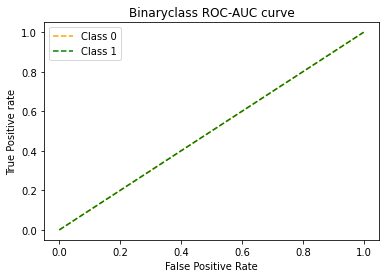

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_true1, y_pd1[:], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1')


plt.title('Binaryclass ROC-AUC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Binaryclass ROC',dpi=300);

Confusion matrix for multi classification

In [ ]:
confusion = confusion_matrix(y_true, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 24   6   4   2   2   4  47   9]
 [ 55 158  72  59  75 152 222  64]
 [ 30  20  59  23   5  12  61  28]
 [  5  18   7  46  11   6  43   4]
 [ 24  18  16  10  29  15  60  16]
 [ 17  14  12   7   2  40  19  18]
 [ 22   7   9   7   1   0  46   2]
 [ 12  15   6   9  12  12  24  42]]


In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_true, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_true, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_true, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_true, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_true, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_true, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_true, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_true, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_true, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_true, y_pred, average='weighted')))


from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_true, y_pred, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4','Class 5','Class 6','Class 7', 'Class 8']))


Accuracy: 0.24

Micro Precision: 0.24
Micro Recall: 0.24
Micro F1-score: 0.24

Macro Precision: 0.26
Macro Recall: 0.28
Macro F1-score: 0.23

Weighted Precision: 0.40
Weighted Recall: 0.24
Weighted F1-score: 0.26

Classification Report

              precision    recall  f1-score   support

     Class 1       0.13      0.24      0.17        98
     Class 2       0.62      0.18      0.28       857
     Class 3       0.32      0.25      0.28       238
     Class 4       0.28      0.33      0.30       140
     Class 5       0.21      0.15      0.18       188
     Class 6       0.17      0.31      0.22       129
     Class 7       0.09      0.49      0.15        94
     Class 8       0.23      0.32      0.27       132

    accuracy                           0.24      1876
   macro avg       0.26      0.28      0.23      1876
weighted avg       0.40      0.24      0.26      1876



<font color = "yellow"><font size=4>Predicting class wise probability for test data

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score

'''
#encoding categorical fetures and target variable
encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(car_df[features])
car_df_encoded = pd.DataFrame(data_encoded, columns=features)
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(car_df['class'])
car_df_encoded['class'] = target_encoded
'''


pred_prob=loaded_model.predict({'main_input': x_test})
print(pred_prob)

[array([[0.5105586 ],
       [0.20080861],
       [0.37430668],
       ...,
       [0.6952995 ],
       [0.34099424],
       [0.75781846]], dtype=float32), array([[0.2522483 , 0.19243684, 0.0328109 , ..., 0.01492654, 0.14250258,
        0.03224345],
       [0.4000613 , 0.01630369, 0.00532168, ..., 0.01422178, 0.21668959,
        0.15788849],
       [0.2767433 , 0.03646301, 0.01845084, ..., 0.11054572, 0.18110673,
        0.14268978],
       ...,
       [0.00595306, 0.10159076, 0.35416847, ..., 0.3296447 , 0.10781695,
        0.02333627],
       [0.16454661, 0.13642071, 0.05883919, ..., 0.13300647, 0.06480328,
        0.335533  ],
       [0.00417744, 0.10929733, 0.4555442 , ..., 0.2766926 , 0.08611232,
        0.00546741]], dtype=float32)]


In [ ]:
multi_predicted = pred_prob[1]
y_tr = test_class_arr2

<font color = "yellow"><font size=5.5>ROC AUC score

In [ ]:

#roc auc score
score1 = roc_auc_score(y_tr, multi_predicted, multi_class='ovo', average='macro')

score3 = roc_auc_score(y_tr, multi_predicted, multi_class='ovo', average='weighted')

In [ ]:
print("macro ROC AUC Score: ", score1)
print("")

print("")
print("Weighted ROC AUC Score: ", score3)

micro ROC AUC Score:  0.6905317677130843


Weighted ROC AUC Score:  0.6691013698476658


<font color = "yellow"><font size=5.5>ROC AUC curve for multi class

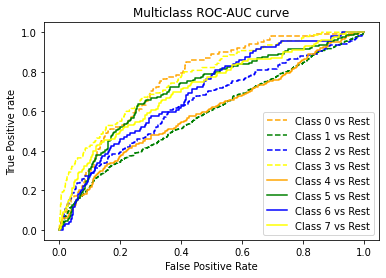

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 8

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_tr, multi_predicted[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='-',color='orange', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='-',color='green', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='-',color='blue', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='-',color='yellow', label='Class 7 vs Rest')

plt.title('Multiclass ROC-AUC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);